In [1]:
import os
import sys
sys.path.insert(0, '../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import json
import random
import numpy as np
import torch
from train.train import Trainer
from IPython.display import Image

### Fix Seed and Train

In [3]:
config = {
    "MODEL": "TCN",
    "BATCH": 32,
    "SEED": 42,
    "EPOCHS": 1,
    "EARLY_STOP": 20,
    "LR": 0.005,
    "MOMENTUM": 0.9,
    "USE_CUDA": True,
    "N_LAYER": 1,
    "HIDDEN_DIM": 128,
    "N_FEAT": 50,
    "DROPOUT": 0.3,
    "BIDIRECTIONAL": False,
    "LB": 0,
    "UB": 0.2,
    "TCN": {
        "n_feature": 50,
        "n_output": 50,
        "kernel_size": 4,
        "n_dropout": 0.1,
        "n_timestep": 63
    },
    "TRANSFORMER": {
        "n_feature": 50,
        "n_timestep": 63,
        "n_layer": 6,
        "n_head": 5,
        "n_dropout": 0.1,
        "n_output": 50
    }
}
os.environ["PYTHONHASHSEED"] = str(config["SEED"])
random.seed(config["SEED"])
np.random.seed(config["SEED"])
torch.manual_seed(config["SEED"])
torch.cuda.manual_seed(config["SEED"])
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


worker = Trainer(config)
worker.set_data()
# worker.train(visualize=True)

In [4]:
print(worker.train_x_raw.shape)
print(worker.train_y_raw.shape)

print(worker.test_x_raw.shape)
print(worker.test_y_raw.shape)

(3736, 63, 50)
(3736, 21, 50)
(1190, 63, 50)
(1190, 21, 50)


- Data Shapes:
    - y_return represents the historical returns data with dimensions [batch_size, time_steps, num_assets].
    - weights represents the allocation weights for each asset in the portfolio with dimensions [batch_size, num_assets].

- Reshaping:
    - torch.unsqueeze is used to adjust the dimensions of weights and meanReturn to facilitate matrix multiplication operations later.

- Mean Return Calculation:
    - meanReturn calculates the mean return for each asset across the time steps for each batch. It reshapes the mean return tensor to [batch_size, num_assets, 1].

- Covariance Matrix Calculation: It computes the covariance matrix for each batch separately.
    - np.cov(batch.cpu().T, ddof=0) calculates the covariance matrix for each batch (with ddof=0 indicating population covariance).
    - These individual covariance matrices are then converted into a tensor and moved to the GPU (to("cuda")).


- Portfolio Return Calculation:

portReturn calculates the expected portfolio return for each batch by multiplying the weights by the mean returns for that batch. It reshapes the result to [batch_size, 1, 1].


- Portfolio Volatility Calculation:

    - portVol computes the portfolio volatility for each batch using the formula: weights * covmat * weights^T.
It multiplies the covariance matrix covmat by the transposed weights (weights^T), then by the original weights, to obtain a scalar value for the portfolio volatility for each batch. The resulting shape is [batch_size, 1, 1].


- Sharpe Ratio Calculation:
    - Finally, it calculates the Sharpe ratio for each batch using the formula 
        - (portReturn * 12 - 0.02) / (torch.sqrt(portVol * 12)). 
        - The constant 12 is used to annualize the returns and volatility. 
        - The resulting shape is [batch_size, 1, 1].


The portfolio volatility calculation involves using the covariance matrix covmat, 
which captures the relationships (covariances) between the different assets in the portfolio. 
The expression weights * covmat * weights^T is a common way to compute the portfolio variance, 
where weights represent the allocation of assets in the portfolio.

This formula essentially considers the weighted sum of the variances of individual assets along with the weighted covariances between assets. 
The covariance matrix is critical in portfolio optimization 
as it quantifies the degree of co-movement between different assets, 
which influences the overall risk (volatility) of the portfolio.

Epoch 1/1
----------

-------------------

y_return.shape:  torch.Size([32, 21, 50])
weights.shape:  torch.Size([32, 50])
meanReturn.shape:  torch.Size([32, 50, 1])
covmat.shape:  torch.Size([32, 50, 50])
portReturn.shape:  torch.Size([32, 1, 1])
portVol.shape:  torch.Size([32, 1, 1])
objective.shape:  torch.Size([32, 1, 1])

-------------------

y_return.shape:  torch.Size([32, 21, 50])
weights.shape:  torch.Size([32, 50])
meanReturn.shape:  torch.Size([32, 50, 1])
covmat.shape:  torch.Size([32, 50, 50])
portReturn.shape:  torch.Size([32, 1, 1])
portVol.shape:  torch.Size([32, 1, 1])
objective.shape:  torch.Size([32, 1, 1])

-------------------

y_return.shape:  torch.Size([32, 21, 50])
weights.shape:  torch.Size([32, 50])
meanReturn.shape:  torch.Size([32, 50, 1])
covmat.shape:  torch.Size([32, 50, 50])
portReturn.shape:  torch.Size([32, 1, 1])
portVol.shape:  torch.Size([32, 1, 1])
objective.shape:  torch.Size([32, 1, 1])

-------------------

y_return.shape:  torch.Size([32, 21, 50

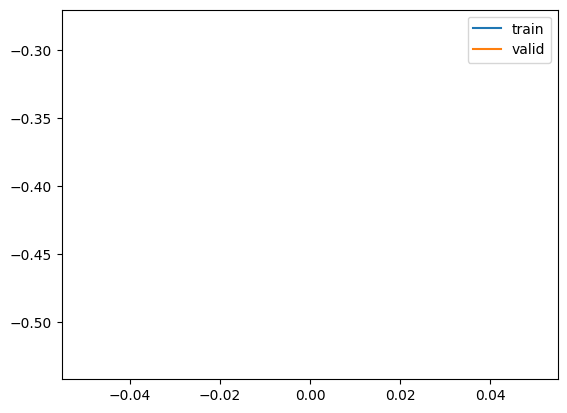

(TCN(
   (tcn): TemporalConvNet(
     (network): Sequential(
       (0): TemporalBlock(
         (conv1): Conv1d(50, 5, kernel_size=(4,), stride=(1,), padding=(3,))
         (chomp1): Chomp1d()
         (relu1): ReLU()
         (dropout1): Dropout(p=0.1, inplace=False)
         (conv2): Conv1d(5, 5, kernel_size=(4,), stride=(1,), padding=(3,))
         (chomp2): Chomp1d()
         (relu2): ReLU()
         (dropout2): Dropout(p=0.1, inplace=False)
         (net): Sequential(
           (0): Conv1d(50, 5, kernel_size=(4,), stride=(1,), padding=(3,))
           (1): Chomp1d()
           (2): ReLU()
           (3): Dropout(p=0.1, inplace=False)
           (4): Conv1d(5, 5, kernel_size=(4,), stride=(1,), padding=(3,))
           (5): Chomp1d()
           (6): ReLU()
           (7): Dropout(p=0.1, inplace=False)
         )
         (downsample): Conv1d(50, 5, kernel_size=(1,), stride=(1,))
         (relu): ReLU()
       )
       (1): TemporalBlock(
         (conv1): Conv1d(5, 5, kernel_size=

In [5]:
worker.train(visualize=True)

### Backtest

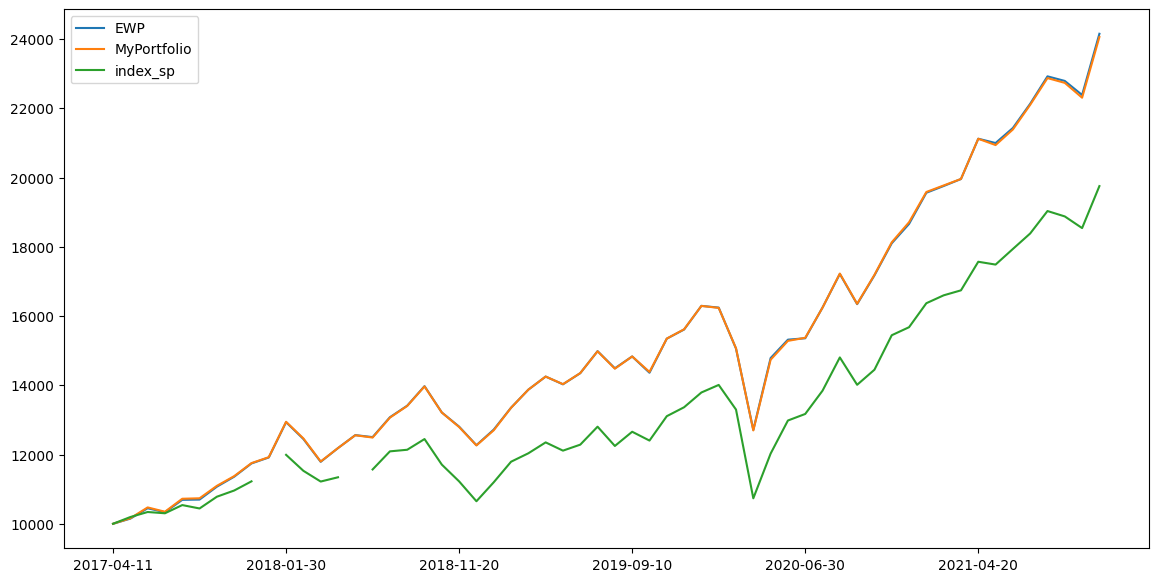

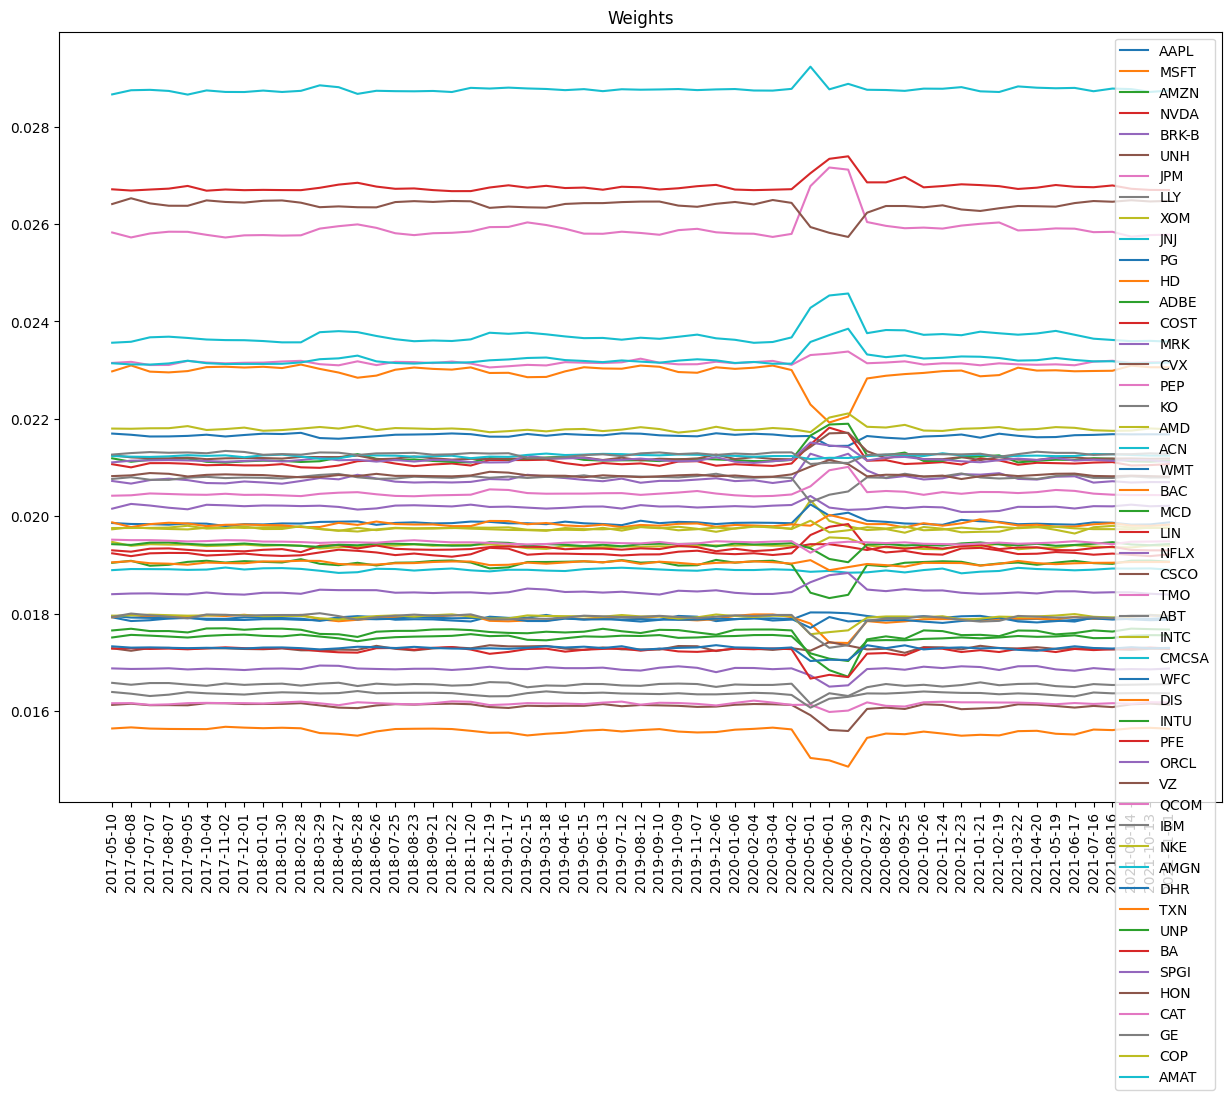

Annualized Return of Portfolio
EWP_Return      0.171943
My_Return       0.171293
Index_Return    0.134716
dtype: float64
--------------------
Annualized Volatility of Portfolio
EWP_Return      0.163881
My_Return       0.163731
Index_Return    0.166945
dtype: float64
--------------------
Annualized Sharp Ratio of Portfolio
EWP_Return      1.049193
My_Return       1.046183
Index_Return    0.806953
dtype: float64
--------------------
MDD
          EWP MyPortfolio    index_sp
0  2020-01-06  2020-01-06  2020-02-04
1  2020-04-02  2020-04-02  2020-04-02
2   -0.219904    -0.22071   -0.233713


In [6]:
worker.backtest(visualize=True)